In [1]:
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
x = np.arange(0, 1.5+0.004, 0.004)

In [3]:
first_x1 = np.sqrt(2*0.3*x)
first_x2 = -np.sqrt(2*0.3*x)
y1 = np.concatenate((first_x1, first_x2))
x1 = np.concatenate((x,x))

In [4]:
second_x1 = np.sqrt(2*0.5*x)
second_x2 = -np.sqrt(2*0.5*x)
y2 = np.concatenate((second_x1, second_x2))
x2 = np.concatenate((x,x)) - 0.4

In [5]:
third_x1 = np.sqrt(2*x)
third_x2 = -np.sqrt(2*x)
y3 = np.concatenate((third_x1, third_x2))
x3 = np.concatenate((x,x)) - 0.8

<AxesSubplot:>

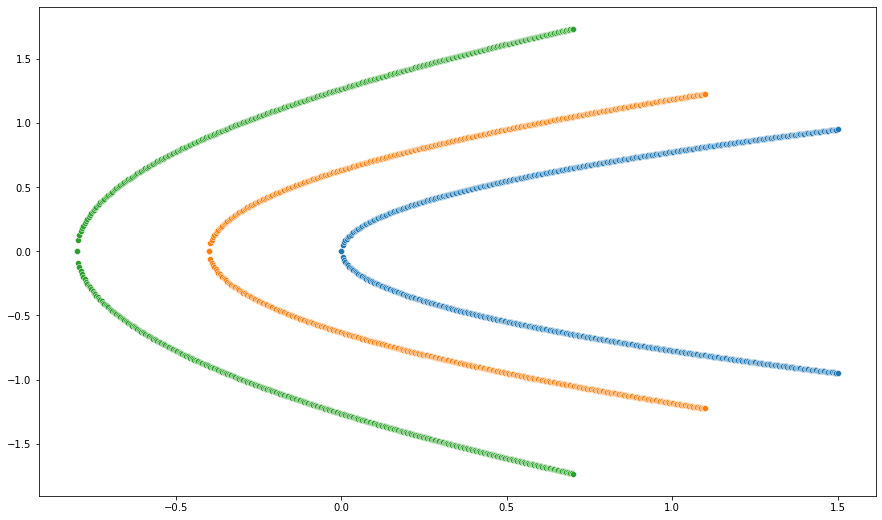

In [6]:
plt.figure(figsize=(15,9))
sns.scatterplot(x=x1, y=y1)
sns.scatterplot(x=x2, y=y2)
sns.scatterplot(x=x3, y=y3)

<AxesSubplot:>

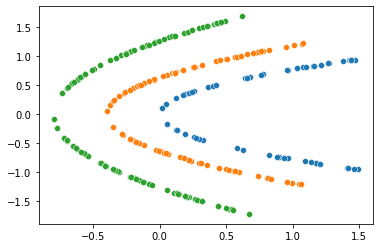

In [7]:
a = np.array(list(zip(x1, y1)))
ind = np.arange(0, len(a))
rind = np.random.choice(ind, 60)
x1_ = a[rind][:,0]
y1_ = a[rind][:,1]
sns.scatterplot(x=x1_, y=y1_)


a = np.array(list(zip(x2, y2)))
ind = np.arange(0, len(a))
rind = np.random.choice(ind, 100)
x2_ = a[rind][:,0]
y2_ = a[rind][:,1]
sns.scatterplot(x=x2_, y=y2_)


a = np.array(list(zip(x3, y3)))
ind = np.arange(0, len(a))
rind = np.random.choice(ind, 120)
x3_ = a[rind][:,0]
y3_ = a[rind][:,1]
sns.scatterplot(x=x3_, y=y3_)

In [8]:
q1 = np.array(list(zip(x1_, y1_)))
q2 = np.array(list(zip(x2_, y2_)))
q3 = np.array(list(zip(x3_, y3_)))

In [9]:
X = np.concatenate((q1, q2, q3))
Y = np.array([0]*60 + [1]*100 + [2]*120).reshape(-1,1)

In [10]:
X.shape

(280, 2)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

<AxesSubplot:>

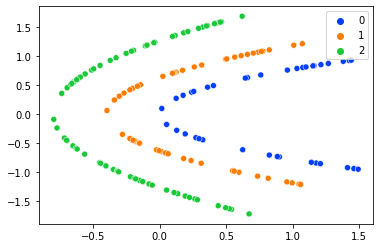

In [12]:
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train.ravel(), palette='bright')

<AxesSubplot:>

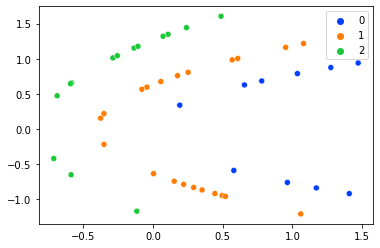

In [13]:
sns.scatterplot(x=X_val[:,0], y=X_val[:,1], hue=y_val.ravel(), palette='bright')

<AxesSubplot:>

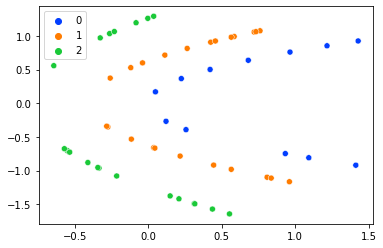

In [14]:
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test.ravel(), palette='bright')

In [15]:
y_train.ravel()

array([2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2,
       1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0,
       1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0,
       1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       0, 1, 0])

In [16]:
batch_size = 1
train_in_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train.astype(np.float32)), 
                                                  torch.tensor(y_train.ravel().astype(np.int64)))

valid_in_dataset = torch.utils.data.TensorDataset(torch.tensor(X_val.astype(np.float32)), 
                                                  torch.tensor(y_val.ravel().astype(np.int64)))

test_in_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test.astype(np.float32)), 
                                                  torch.tensor(y_test.ravel().astype(np.int64)))

In [17]:
train_loader = torch.utils.data.DataLoader(train_in_dataset,
                                          batch_size=batch_size, shuffle=False)
val_loader = torch.utils.data.DataLoader(valid_in_dataset,
                                          batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_in_dataset,
                                          batch_size=batch_size, shuffle=False)

In [18]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 3)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [19]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=2, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=3, bias=True)
)


In [20]:
learning_rate = 0.05
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [21]:
loss = nn.CrossEntropyLoss()

In [22]:
inputs = torch.randn(3,5)
inputs

tensor([[-0.9050, -0.6234,  0.1861, -0.4429,  0.1665],
        [-1.8410,  1.6186,  0.3373,  0.8685, -0.6011],
        [ 1.2477, -0.8730,  0.5072, -0.8888,  1.7461]])

In [23]:
target = torch.empty(3, dtype=torch.long).random_(5)
target

tensor([3, 1, 0])

In [24]:
loss(inputs, target)

tensor(1.2234)

In [25]:
def train(model, optimizer, loss_fn, metric, train_loader, val_loader, epochs=20, device="cpu", log_step=5):
    for epoch in range(1, epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
#             print(inputs)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)
        
        model.eval()
        num_correct = 0 
        num_examples = 0
        preds = np.array([])
        actual = np.array([])
        for batch in val_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output, targets) 
            valid_loss += loss.data.item() * inputs.size(0)
            if (metric == 'acc') | (metric == 'accuracy'):
                correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
                num_correct += torch.sum(correct).item()
                num_examples += correct.shape[0]
            else:
                preds = np.append(preds, output.ravel().data.detach().numpy())
                actual = np.append(actual, targets.ravel().data.detach().numpy())
        valid_loss /= len(val_loader.dataset)

        if epoch % log_step == 0:
            if (metric == 'acc') | (metric == 'accuracy'): 
                print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, accuracy = {:.3f}'.format(
                    epoch, training_loss, valid_loss, num_correct / num_examples))
            else:
                print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, mse = {:.7f}'.format(
                    epoch, training_loss, valid_loss, mean_squared_error(actual, preds)))

In [26]:
train(net, optimizer, criterion, 'acc',
      train_loader, val_loader, epochs=200)

Epoch: 5, Training Loss: 0.0264, Validation Loss: 0.0242, accuracy = 1.000
Epoch: 10, Training Loss: 0.0081, Validation Loss: 0.0100, accuracy = 1.000
Epoch: 15, Training Loss: 0.0045, Validation Loss: 0.0058, accuracy = 1.000
Epoch: 20, Training Loss: 0.0031, Validation Loss: 0.0041, accuracy = 1.000
Epoch: 25, Training Loss: 0.0023, Validation Loss: 0.0032, accuracy = 1.000
Epoch: 30, Training Loss: 0.0018, Validation Loss: 0.0026, accuracy = 1.000
Epoch: 35, Training Loss: 0.0015, Validation Loss: 0.0022, accuracy = 1.000
Epoch: 40, Training Loss: 0.0013, Validation Loss: 0.0019, accuracy = 1.000
Epoch: 45, Training Loss: 0.0011, Validation Loss: 0.0017, accuracy = 1.000
Epoch: 50, Training Loss: 0.0010, Validation Loss: 0.0015, accuracy = 1.000
Epoch: 55, Training Loss: 0.0009, Validation Loss: 0.0014, accuracy = 1.000
Epoch: 60, Training Loss: 0.0008, Validation Loss: 0.0013, accuracy = 1.000
Epoch: 65, Training Loss: 0.0008, Validation Loss: 0.0012, accuracy = 1.000
Epoch: 70, Tr

In [27]:
from matplotlib.colors import ListedColormap

def plot_mesh(X, y, model):
    plt.figure(figsize=(15,9))
    colors = ['violet', 'lightgreen', 'crimson']
    cmap = ListedColormap(sns.color_palette(colors))
    
    x1_min, x1_max = X[:, 0].min()-1.5, X[:, 0].max()+1.5
    x2_min, x2_max = X[:, 1].min()-1.5, X[:, 1].max()+1.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.005),
                           np.arange(x1_min, x1_max, 0.005))
    
    in_model = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
    Z = model(in_model)
    output = torch.max(F.softmax(Z, dim=1), dim=1)[1]
    plt.contourf(xx1, xx2, output.reshape(xx2.shape), cmap=cmap)
    
    plt.scatter(X[y==0,0],X[y==0,1], s=80, cmap=cmap, c=colors[0], edgecolors='black')
    plt.scatter(X[y==1,0],X[y==1,1], s=80, cmap=cmap, c=colors[1], edgecolors='black')
    plt.scatter(X[y==2,0],X[y==2,1], s=80, cmap=cmap, c=colors[2], edgecolors='black')

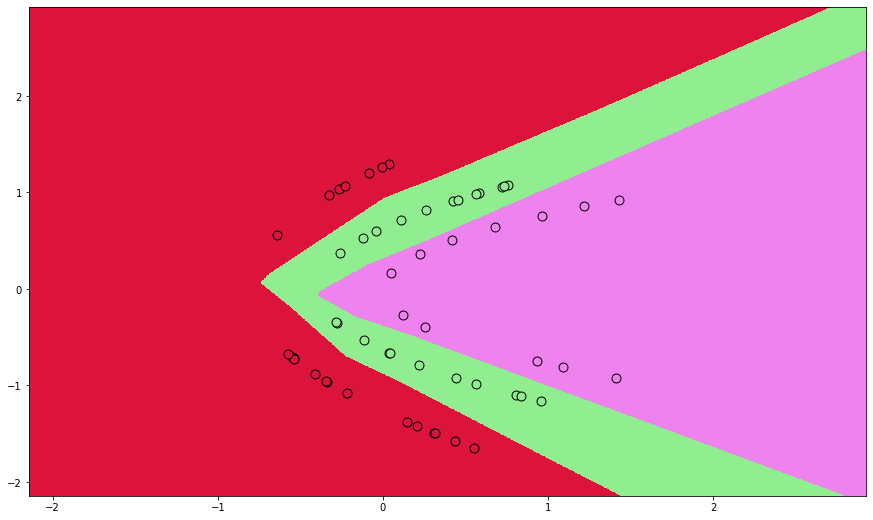

In [28]:
plot_mesh(X_test, y_test.ravel(), net)

In [29]:
def fx(t):
    return np.sin(t*t-5*t+6)

<AxesSubplot:>

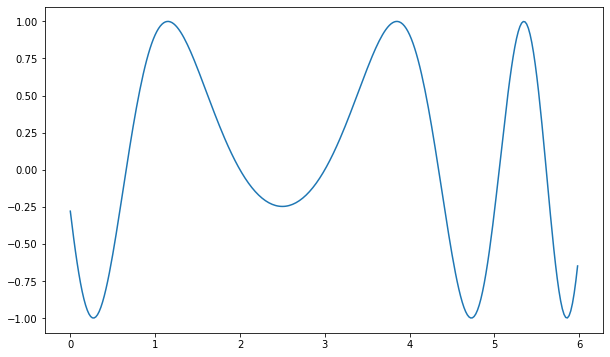

In [30]:
t = np.arange(0, 6, 0.02)
FX = fx(t)
plt.figure(figsize=(10,6))
sns.lineplot(x=t, y=FX)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(t, FX, test_size=0.5, random_state=42)

<AxesSubplot:>

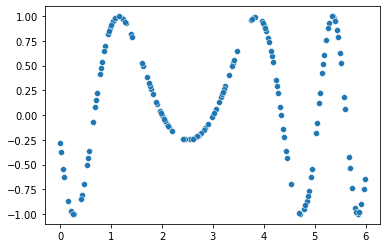

In [32]:
sns.scatterplot(x=X_train, y=y_train)

In [33]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [34]:
batch_size = 48
train_in_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train.astype(np.float32)), 
                                                  torch.tensor(y_train.astype(np.float32)))

valid_in_dataset = torch.utils.data.TensorDataset(torch.tensor(X_val.astype(np.float32)), 
                                                  torch.tensor(y_val.astype(np.float32)))

test_in_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test.astype(np.float32)), 
                                                  torch.tensor(y_test.astype(np.float32)))

In [35]:
train_loader = torch.utils.data.DataLoader(train_in_dataset,
                                          batch_size=batch_size, shuffle=False)
val_loader = torch.utils.data.DataLoader(valid_in_dataset,
                                          batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_in_dataset,
                                          batch_size=batch_size, shuffle=False)

In [36]:
for batch in train_loader:
    data, target = batch
    print(data)
    print(target)
    break

tensor([[5.3800],
        [2.1400],
        [4.4600],
        [3.1600],
        [5.6000],
        [4.9200],
        [4.4400],
        [1.3000],
        [3.9600],
        [1.7000],
        [4.2600],
        [3.1800],
        [0.2400],
        [0.7000],
        [0.5600],
        [2.8400],
        [5.6800],
        [5.0800],
        [3.4000],
        [1.0200],
        [1.9000],
        [4.1600],
        [4.9400],
        [0.8200],
        [1.7800],
        [4.8800],
        [2.7200],
        [0.5200],
        [5.8600],
        [2.8200],
        [4.0000],
        [0.0000],
        [5.3600],
        [5.4400],
        [2.0000],
        [5.1800],
        [5.1000],
        [3.4200],
        [1.9600],
        [0.7200],
        [1.2200],
        [3.0000],
        [4.7200],
        [4.0400],
        [4.8400],
        [0.2200],
        [5.9200],
        [5.3400]])
tensor([[ 0.9819],
        [-0.1201],
        [-0.4350],
        [ 0.1845],
        [ 0.0647],
        [-0.6263],
        [-0.3635],
  

In [37]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(1, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        x = self.fc3(x)
        return x

In [38]:
net = Network()
print(net)

Network(
  (fc1): Linear(in_features=1, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=1, bias=True)
)


In [40]:
optimizer = optim.Adadelta(net.parameters(), lr=0.9)
optimizer = optim.SGD(net.parameters(), lr=0.05, momentum=0.9)
optimizer = optim.RMSprop(net.parameters(), lr=0.005, momentum=0.5)
optimizer = optim.Adam(net.parameters(), lr=0.05)
criterion = nn.MSELoss()

In [41]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.05
    weight_decay: 0
)

In [42]:
train(net, optimizer, criterion, 'mse',
      train_loader, test_loader, epochs=10000, log_step=100)

Epoch: 100, Training Loss: 0.2415, Validation Loss: 0.2516, mse = 0.2515930
Epoch: 200, Training Loss: 0.1672, Validation Loss: 0.1520, mse = 0.1520412
Epoch: 300, Training Loss: 0.2047, Validation Loss: 0.1173, mse = 0.1172933
Epoch: 400, Training Loss: 0.0073, Validation Loss: 0.0055, mse = 0.0055186
Epoch: 500, Training Loss: 0.0048, Validation Loss: 0.0031, mse = 0.0031293
Epoch: 600, Training Loss: 0.0032, Validation Loss: 0.0020, mse = 0.0019749
Epoch: 700, Training Loss: 0.0027, Validation Loss: 0.0016, mse = 0.0015982
Epoch: 800, Training Loss: 0.0026, Validation Loss: 0.0018, mse = 0.0018247
Epoch: 900, Training Loss: 0.0029, Validation Loss: 0.0020, mse = 0.0019925
Epoch: 1000, Training Loss: 0.0025, Validation Loss: 0.0020, mse = 0.0019857
Epoch: 1100, Training Loss: 0.0024, Validation Loss: 0.0017, mse = 0.0017149
Epoch: 1200, Training Loss: 0.0032, Validation Loss: 0.0033, mse = 0.0033155
Epoch: 1300, Training Loss: 0.0044, Validation Loss: 0.0022, mse = 0.0022176
Epoch: 1

In [43]:
res = []
for i in t:
    output = net(torch.tensor([i]).float())
    res.append(output.data.detach().numpy()[0])

In [44]:
output.data.detach().numpy()[0]

-0.88513494

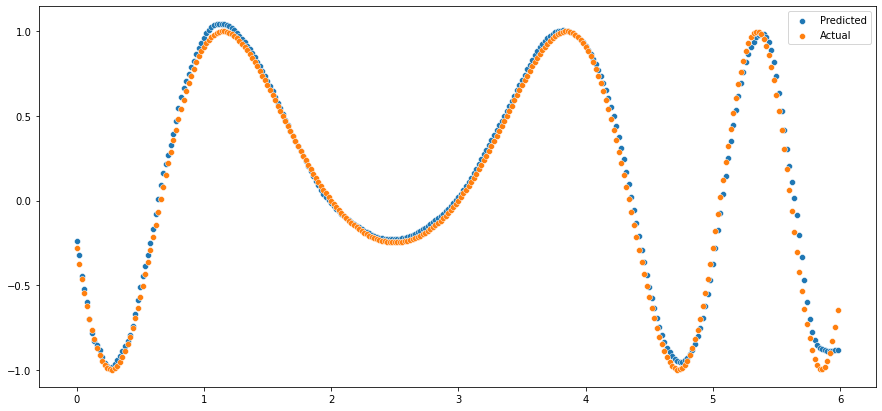

In [45]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=t, y=res, label='Predicted')
sns.scatterplot(x=t, y=FX, label='Actual')
plt.legend()

In [45]:
mean_squared_error(FX, res)

0.00273768770424485

In [309]:
# optimizer = optim.LBFGS(net.parameters(), lr=0.1)

In [140]:
for epoch in range(epochs):
    for x_batch, y_batch in train_loader:
        y = torch.tensor(one_hot.transform(y_batch).toarray())

        optimizer.zero_grad()
        output = net(x_batch[0].float())
        loss = criterion(output, y[0].float())
                
        
        loss.backward()
        optimizer.step()
        
    test_loss = 0
    correct = 0
    preds = []
    for x_batch, y_batch in val_loader:
        y = torch.tensor(one_hot.transform(y_batch).toarray())
        output = net(x_batch[0])
        test_loss += criterion(output, y[0].float())
#         pred = [np.argmax(i) for i in output.detach().numpy()]
        pred = output.detach().numpy().argmax()
        preds.append(pred)
    
    acc = accuracy_score(y_val, preds)
        
    test_loss /= len(val_loader.dataset)
    if test_loss <= eps:
        break
    print("epoch [{}/{}], test loss:{:.4f}, accuracy: {:.2f}".format(epoch+1, epochs, test_loss.detach().numpy(), acc))

epoch [1/50], test loss:0.6116, accuracy: 0.53
epoch [2/50], test loss:0.5788, accuracy: 0.53
epoch [3/50], test loss:0.5412, accuracy: 0.56
epoch [4/50], test loss:0.4854, accuracy: 0.56
epoch [5/50], test loss:0.4309, accuracy: 0.60
epoch [6/50], test loss:0.3825, accuracy: 0.69
epoch [7/50], test loss:0.3388, accuracy: 0.76
epoch [8/50], test loss:0.3054, accuracy: 0.84
epoch [9/50], test loss:0.2786, accuracy: 0.87
epoch [10/50], test loss:0.2562, accuracy: 0.89
epoch [11/50], test loss:0.2392, accuracy: 0.89
epoch [12/50], test loss:0.2216, accuracy: 0.89
epoch [13/50], test loss:0.2067, accuracy: 0.93
epoch [14/50], test loss:0.1920, accuracy: 0.96
epoch [15/50], test loss:0.1790, accuracy: 0.96
epoch [16/50], test loss:0.1678, accuracy: 0.98
epoch [17/50], test loss:0.1552, accuracy: 0.98
epoch [18/50], test loss:0.1434, accuracy: 1.00
epoch [19/50], test loss:0.1353, accuracy: 1.00
epoch [20/50], test loss:0.1277, accuracy: 1.00
epoch [21/50], test loss:0.1190, accuracy: 1.00
e

In [56]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
    for epoch in range(1, epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs)
            loss = loss_fn(output, targets.long())
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)
        
        model.eval()
        num_correct = 0 
        num_examples = 0
        for batch in val_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output, targets.long()) 
            valid_loss += loss.data.item() * inputs.size(0)
            correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
        valid_loss /= len(val_loader.dataset)

        if epoch % 5 == 0:
            print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss,
            valid_loss, num_correct / num_examples))